<a href="https://colab.research.google.com/github/shreenithi23/Image-Preprocessing/blob/main/Image_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import zipfile
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

defining the path

In [13]:
zip_file='women-fashion.zip'
extract_folder='/women fashion'

extracting the zip file

In [14]:
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

function to load images

In [15]:
def load_image(img_folder,img_files):
  images=[]
  for file in img_files:
    if file.endswith(('.jpg','.jpeg','.png','.webp')):
      img_path=os.path.join(img_folder,file)
      img=Image.open(img_path).convert('RGB')
      images.append(img)
  return images

In [16]:
img_folder_path=os.path.join(extract_folder,'women fashion')
img_files=[i for i in os.listdir(img_folder_path) if i.lower().endswith(('jpg','jpeg','png','webp'))]
images=load_image(img_folder_path,img_files)

display the original images

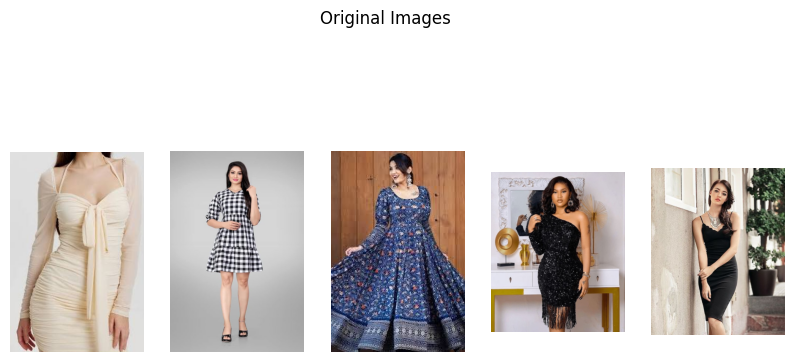

In [17]:
plt.figure(figsize=(10,5))
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(images[i])
  plt.axis('off')
plt.suptitle('Original Images')
plt.show()

Resizing the images:
to a standard size to ensure uniform input sizes for the models. Helps reduce computational load and memory usage

function to resize

In [18]:
def resize(images,size=(128,128)):
  resized_img=[img.resize(size) for img in images]
  return resized_img

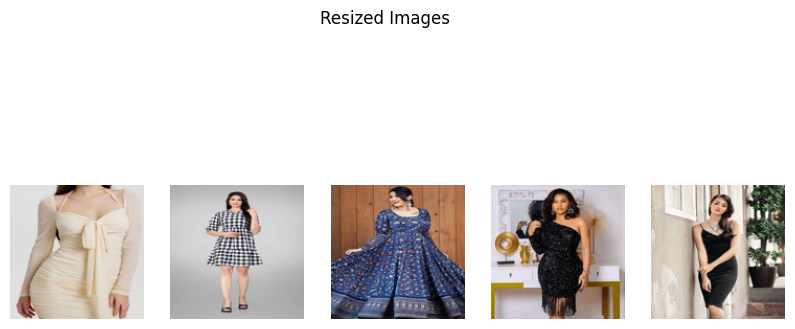

In [19]:
resized_img=resize(images)
plt.figure(figsize=(10,5))
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(resized_img[i])
  plt.axis('off')
plt.suptitle('Resized Images')
plt.show()

normalizing Images is setting the pixel intensity values to a specific range to have a consistent scale of the input features while using it in machine learning models

NORMALIZING THE PIXEL VALUES

In [20]:
def normalize(images):
  normalized_img=[np.array(img)/255.0 for img in images]
  return np.array(normalized_img)

In [ ]:
normalized_imgs=normalize(resized_img)

print("Original Image Array: ")
print(np.array(resized_img[0]))

print('\nNormalized Image Array: ')
print(normalized_imgs[0])

Data Augmentation :
creating new training samples from the existing ones using various transformations like rotations,translation,scaling and flipping.


DATA AUGMENTATION

In [22]:
from keras.preprocessing.image import ImageDataGenerator

In [23]:
data=ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

augmenting a single image

In [24]:
sample_img=normalized_imgs[0]
sample_img=np.expand_dims(sample_img,axis=0)
aug_iter=data.flow(sample_img)

displaying the augmented images

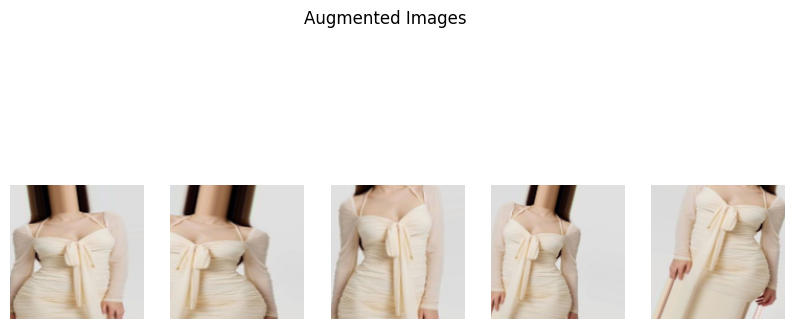

In [25]:
plt.figure(figsize=(10,5))
for i in range(5):
  plt.subplot(1,5,i+1)
  batch=next(aug_iter)
  img_aug=batch[0]
  plt.imshow(img_aug)
  plt.axis('off')
plt.suptitle('Augmented Images')
plt.show()

histogram equalization: contrast enhancement technique that redistributes the intensity of the image to span the entire histogram. makes it more uniform highlights features and edges more clearly.

HISTOGRAM EQUALIZATION

In [26]:
import cv2

In [27]:
def hist_eq(img):
  img_yuv=cv2.cvtColor(np.array(img),cv2.COLOR_RGB2YUV)
  img_yuv[:,:,0]=cv2.equalizeHist(img_yuv[:,:,0])
  img_equalised=cv2.cvtColor(img_yuv,cv2.COLOR_YUV2RGB)
  return Image.fromarray(img_equalised)

In [28]:
equalized_img=[hist_eq(img) for img in resized_img]

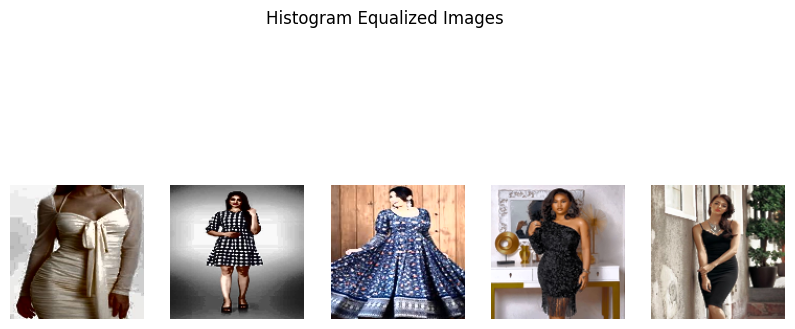

In [29]:
plt.figure(figsize=(10,5))
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(equalized_img[i])
  plt.axis('off')
plt.suptitle('Histogram Equalized Images')
plt.show()